![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/55025843-7d99a280-4fe0-11e9-938a-4879d95c4130.png"
    style="width:150px; float: right; margin: 0 40px 40px 40px;"></img>

# Interactive Notebooks Tutorial

Welcome to Notebooks.ai ❤️, a fully online 🤖, cloud-based ☁️ Data Science environment. All your work, analysis and datasets organized in the same place 🙌.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Objective of this tutorial:

> **Help you get started with Notebooks.ai for Data Science and Python programming.**

_Need help? Create an [issue](https://github.com/notebooks-ai/notebooks-help)._

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Jupyter Notebooks

This document that you're currently reading is a "Jupyter Notebook", and you've probably heard about it before. It's like a text document, but you can run code on it! It can also display inline graphs, pull data from Databases or show excel spreadsheets live! Isn't it amazing? 😄 

**Mildly interesting fact of the day:**

> _Jupyter is a nod to 3 languages: Julia, Python, and R._ Source [@jakevdp](https://twitter.com/jakevdp/status/1033071052652302336).

This is a really quick tutorial on how to get started with Jupyter notebooks (and lab). It shouldn't take more than 10 minutes and you'll be writing Python code right away.

### Part 1: everything is a _cell_

Jupyter Notebooks are organized as a set of _"cells"_. Each cell can contain different types of content: like Python code (or R, Julia, etc), images or even human readable text (markdown), like the one you're currently reading.

I've left a couple of empty cells below for you to see them:

This is another cell containing Markdown (human readable) code. And below, another empty cell:

You can edit these cells just by double clicking on them. Try editing the following cell:

**👉 Double click on me 👈**

When you double click the cell, it should open an "edit mode", and you should see something similar to:

![image](images/_1.png)

If you're seeing those asterisks, it's because you've correctly entered "Edit Mode". Once you've made the changes, you have to "execute", or "run" the cell to reflect the changes. To do that just click on the little _play_ button on the top menu bar:

![image](images/_2.png)

Jupyter notebooks are optimized for an efficient workflow. There are many keyboard shortcuts that will let you interact with your documents, run code and make other changes; mastering these shortcuts will speed up your work. For example, there are two shortcuts to execute a cell:

1. `shift + return`: Run cell and advance to the next one.
2. `ctrl  + return`: Run the cell but don't change focus.


Try them with the following cell:

In [26]:
2 + 2

4

You can try executing these cells as many times as you want, it won't break anything

#### `ctrl + Return` effect:

As you can see in the following animation, the code is correctly executed (it returns 4) and the focus (the blue line at the left side of the cell) stays in the same cell.

![ctrl+enter effect](images/_3.gif)

Now compare it to the next shortcut, `shift + return`:

#### `shift + Return` effect:

![shift+enter effect](images/_4.gif)

As you can see, every time I execute code the focus changes to the cell below.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Part 2: Working with code

Jupyter notebooks have amazing features to include text and images and create beautiful, human readable documents as you've just seen. But their main benefit is working with code. Now we're going to import a few libraries and start experimenting with Python code. We've already done the simple `2 + 2` before, so let's do something a little bit more interesting. First, we need to import `numpy` and `matplotlib`:

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Notebooks.ai include all the most popular Data Science and Deep Learning libraries already installed. And even if there's one missing, you can always install it in your own environment (more on that later). We've just imported these two libraries:
* `numpy` the most popular Python library for array manipulation and numeric computing
* `matplotlib` the most popular visualization library in the Python ecosystem.

Let's now execute a few lines of code and generate some plots:

In [28]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

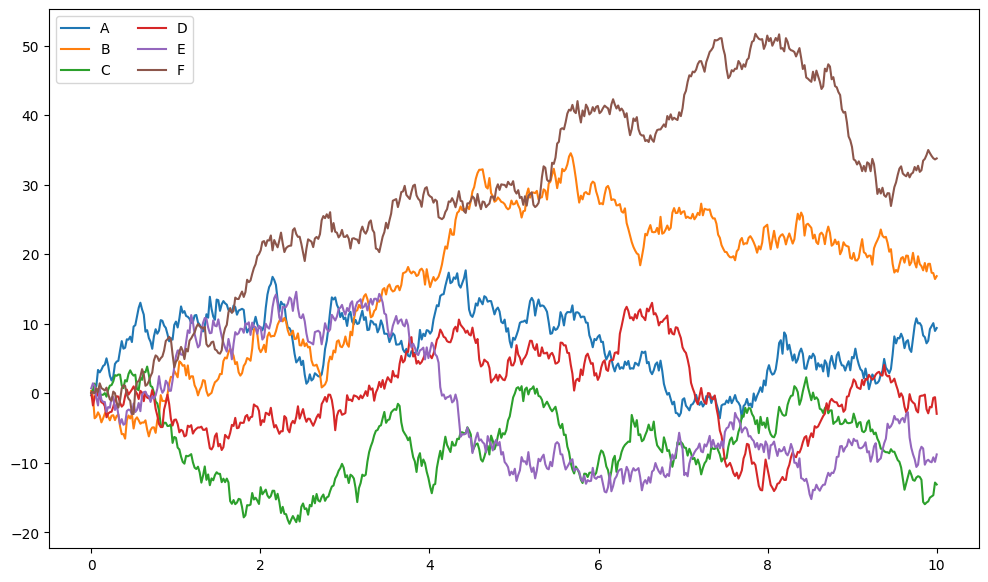

In [29]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

But what is that 😱? Just random generated datapoints, but you can clearly see how simple is to do numeric processing and plotting with Notebooks.ai.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Part 3: Interacting with data

---

<p style="color:red;font-weight:bold;font-size:36px">WARNING: API changed. Read below for more details:</p>

<p style="color:red;font-weight:bold;">The original notebook of this tutorial used the Cryptowatch API to dynamically extract information about cryptocurrency prices. This tutorial was created in 2018, and since then, Kraken (the exchange) acquired cryptowatch and shut down their API (<a href="https://blog.kraken.com/product/cryptowatch-to-sunset-kraken-pro-to-integrate-cryptowatch-features">read more here</a>).</p>

<p style="color:red;font-weight:bold;">I have now migrated the Cryptowatch API to Kraken's API, so the functionality is THE SAME, but of course this doesn't match what's explained in the video.</p>

<p style="color:red;font-weight:bold;">The rest of the notebook remains untouched:</p>

---

Notebooks.ai and Jupyter Lab make it really simple to intereact with files in your local storage. These files are securely stored in the cloud and you can access them from anywhere in the world.

To show you the full potential of Notebooks.ai, we're going to pull cryptocurrencies prices from a public API and download them as Excel files, pretty fancy 😎. I need to import two libraries first: `requests` (to pull data from the web) and `pandas` to process it.

In [30]:
import requests
import pandas as pd

In [31]:
def get_historic_price(symbol, after='2018-09-01'):
    
    url = 'https://api.kraken.com/0/public/OHLC'
    pair = f"{symbol.upper()}USD" # XBTUSD when symbol='xbt' for example
    
    resp = requests.get(url, params={
        "pair": pair,
        'interval': 60,
        'since': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    
    data = resp.json()
    
    results_key = [k for k in data['result'].keys() if k != 'last'][0]
    results = [
        (close_time, float(open), float(high), float(low), float(close), float(volume))
        for (close_time, open, high, low, close, vwap, volume, count)
        in data['result'][results_key]
    ]
    df = pd.DataFrame(results, columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

I will now pull data from Bitcoin and Ether, two of the most popular cryptocurrencies, for the last 7 days:

In [32]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2024-07-27 18:23:02.045234')

In [33]:
btc = get_historic_price('btc', after=last_week)

In [34]:
eth = get_historic_price('eth', after=last_week)

**Bitcoin:**

In [35]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
count,175.000000,175.000000,175.000000,175.000000,175.000000
mean,65477.961143,65674.009143,65177.285143,65432.496571,93.296049
std,2508.757947,2497.183658,2541.941406,2524.957159,100.271639
min,60208.600000,60544.400000,59826.500000,60204.000000,3.954294
25%,64074.800000,64345.850000,63579.450000,63994.300000,30.027532
50%,66112.200000,66255.700000,65853.100000,66110.200000,54.642541
75%,67449.650000,67516.350000,67193.800000,67414.200000,115.556458
max,69799.100000,69985.000000,69575.400000,69799.100000,650.875458


In [36]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2024-07-27 19:00:00,68601.0,68673.2,67734.2,68286.0,174.969764
2024-07-27 20:00:00,68286.0,68394.3,66624.3,67796.7,650.875458
2024-07-27 21:00:00,67796.7,69100.0,67620.0,68842.6,416.694960
2024-07-27 22:00:00,68842.7,68842.7,68536.8,68634.6,103.581315
2024-07-27 23:00:00,68634.6,68634.6,67791.2,67900.8,252.817795


In [37]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175 entries, 2024-07-27 19:00:00 to 2024-08-04 01:00:00
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OpenPrice   175 non-null    float64
 1   HighPrice   175 non-null    float64
 2   LowPrice    175 non-null    float64
 3   ClosePrice  175 non-null    float64
 4   Volume      175 non-null    float64
dtypes: float64(5)
memory usage: 8.2 KB


<Axes: xlabel='CloseTime'>

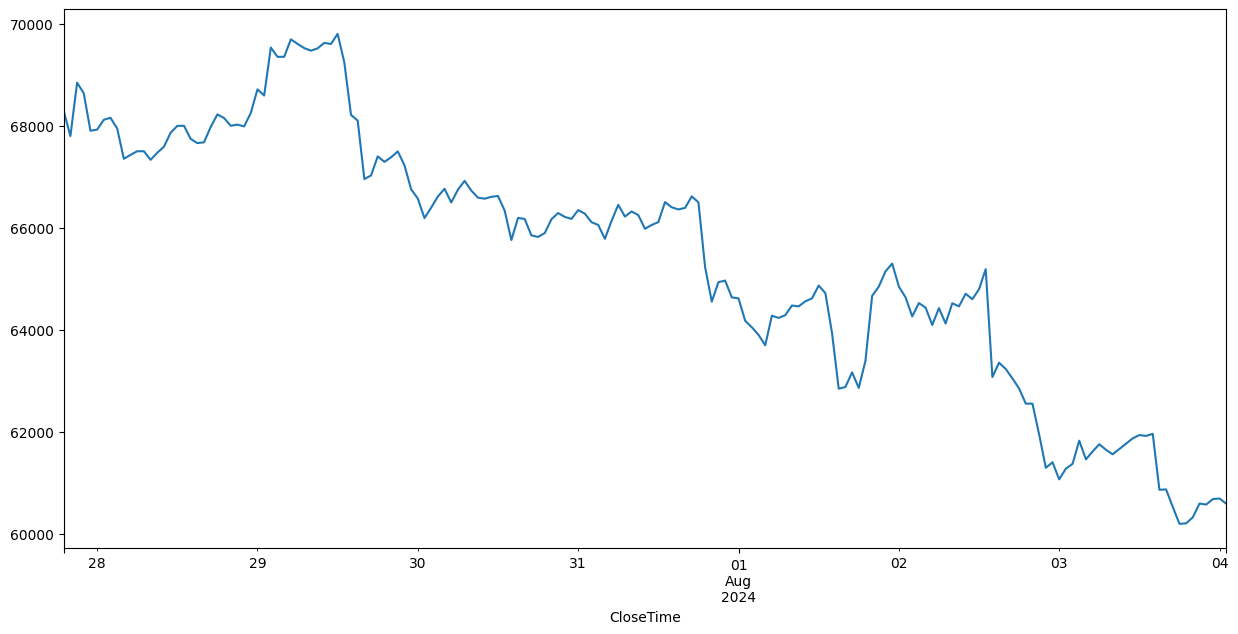

In [38]:
btc['ClosePrice'].plot(figsize=(15, 7))

**Ether:**

In [39]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2024-07-27 19:00:00,3250.76,3262.79,3232.98,3262.79,762.652846
2024-07-27 20:00:00,3262.17,3262.17,3195.00,3242.85,611.756423
2024-07-27 21:00:00,3242.18,3293.44,3234.81,3281.99,937.487925
2024-07-27 22:00:00,3281.99,3288.84,3276.28,3277.11,237.947821
2024-07-27 23:00:00,3274.97,3274.97,3247.85,3249.22,161.761533


<Axes: xlabel='CloseTime'>

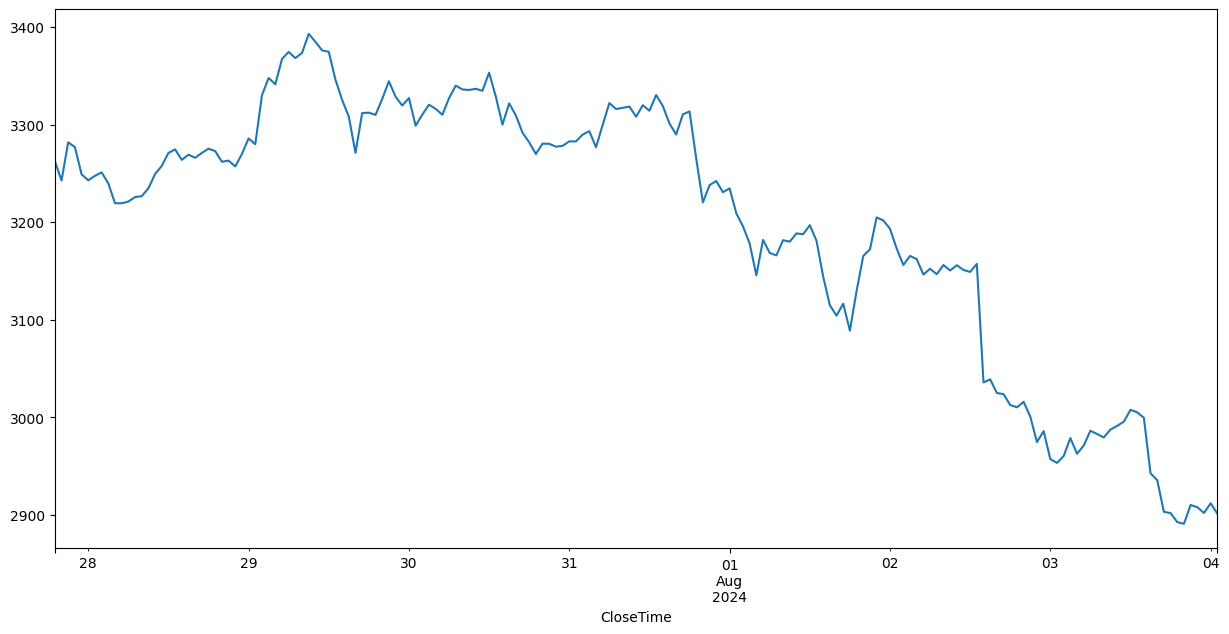

In [40]:
eth['ClosePrice'].plot(figsize=(15, 7))

As you can see, we're able to pull data from the internet with just a few lines, create a DataFrame and plot it all within Jupyter Lab.

In [41]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2024-07-27 19:00:00,3250.76,3262.79,3232.98,3262.79,762.652846
2024-07-27 20:00:00,3262.17,3262.17,3195.00,3242.85,611.756423
2024-07-27 21:00:00,3242.18,3293.44,3234.81,3281.99,937.487925
2024-07-27 22:00:00,3281.99,3288.84,3276.28,3277.11,237.947821
2024-07-27 23:00:00,3274.97,3274.97,3247.85,3249.22,161.761533


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Bonus: Dynamic plots with Bokeh

We've also included [Bokeh](https://bokeh.pydata.org/) as part of this main distribution. Bokeh is a plotting library that generates interactive plots, that can be manipulated right within your browser.

We first need to import the libraries:

In [42]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [43]:
output_notebook()

Loading BokehJS ...

And we generate the plot:

In [47]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend_label='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

☝️ as you can see, the plot is interactive. Try zomming in and out, and scrolling in the plot.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Part 4: Exporting to Excel

We're now ready to generate an Excel file from the downloaded prices. Working with Excel and other formats (like CSV or JSON) is extremely simple in Jupyter Lab (thanks to pandas and Python). Our first step will be to create an "Excel writer", a component from the `pandas` package:

In [58]:
writer = pd.ExcelWriter('cryptos.xlsx')

We'll now write both our Bitcoin and Ether data as separate sheets:

In [59]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [60]:
eth.to_excel(writer, sheet_name='Ether')

And finally, we can save the file:

In [61]:
writer.close()

Once you've saved the file, you should see it in the left side navigation bar:

![Excel file](images/_5.png)

## Final words and how to get help

That's it! It's your time now to start working and playing around with jupyter lab and Notebooks.ai. This product is in an early stage, so we'd love to receive all your feedback and suggestions. If you need help or ideas for us to implement, create an issue in the following replo: [https://github.com/notebooks-ai/notebooks-help](https://github.com/notebooks-ai/notebooks-help). It'll be highly appreciated!

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)